# 舆情时间序列可视化

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('restaurant-comments.xlsx')

In [3]:
df.head()

,comments,date
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00


注意这里的时间列。如果你的Excel文件里的时间格式跟此处一样，包含了__日期和时间(注意二者缺一不可)__ ，那么Pandas会非常智能地帮你把它识别为时间格式，接着往下做就可以了。
反之，如果你获取到的时间只精确到日期，例如"2017-04-20"这样，那么Pandas只会把它当做字符串，后面的时间序列分析无法使用字符串数据。解决办法是在这里加入以下两行代码：

__from dateutil import parser__
__df['date'] = df.date.apply(parser.parse)__

In [4]:
text = df.comments.iloc[0]

In [5]:
# 调用SnowNLP情感分析工具
from snownlp import SnowNLP
s = SnowNLP(text)

In [6]:
s.sentiments

0.6331975099099649

In [7]:
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments

df['sentiment'] = df.comments.apply(get_sentiment_cn)

In [8]:
df.head()

,comments,date,sentiment
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00,0.633198
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00,0.543631
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00,1.000000
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00,0.243871
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00,0.932328


In [9]:
# 求情感分析结果的平均值
df.sentiment.mean()

0.7114015318571119

In [10]:
# 求情感分析结果的中位数
df.sentiment.median()

0.9563139038622388

In [12]:
# 利用 ggplot 绘图工具包实现可视化
%pylab inline
from ggplot import *
# 第一次加载 ggplot 会有一个Warning，问题不大

Populating the interactive namespace from numpy and matplotlib


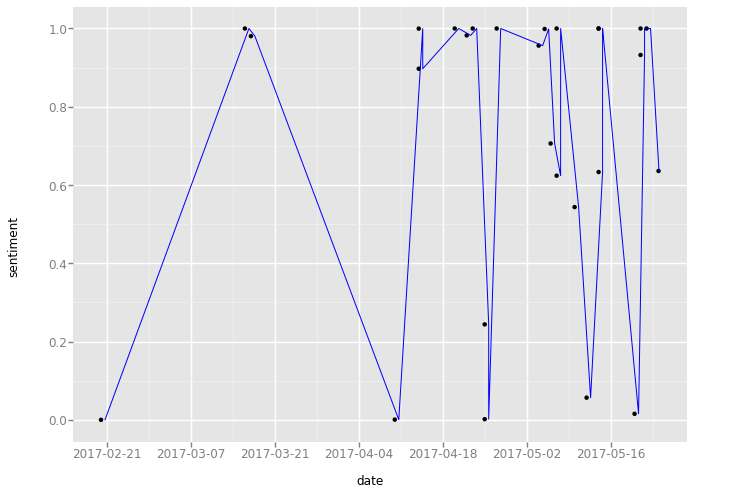

<ggplot: (71098723)>

In [13]:
ggplot(aes(x='date', y='sentiment'), data=df) + geom_point() + geom_line(color = 'blue') + scale_x_date(labels = date_format('%Y-%m-%d'))

In [15]:
# 利用 Pandas 提供的排序功能可以将所有评论的情感分析得分排序(默认升序排列)
# 下面这行代码显示出了得分最低的评论
df.sort_values(['sentiment'])[:1]

,comments,date,sentiment
24,这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人...,2017-02-20 16:00:00,3.622734e-08


In [17]:
# 上面的评论内容显示不全，利用这一行将完整评论打印出来
print df.sort_values(['sentiment']).iloc[0].comments

这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人都多，所以特意错开，这次实在是馋A餐厅了，所以赶在正日子也出来了，从下午四点多的时候我看排号就排到一百多了，我从家开车过去得堵的话一个小时，我一看提前两个小时就在网上先排着号了，差不多我们是六点半到的，到那的时候我看号码前面还有才三十多号，我想着肯定没问题了，等一会就能吃上的，没想到悲剧了，就从我们到那坐到等位区开始，大约是十分二十分一叫号，中途多次我都想走了，哈哈，哎，等到最后早上九点才吃上的，服务员感觉也没以前清闲时周到了，不过这肯定的，一人负责好几桌，今天节日这么多人，肯定是很累的，所以大多也都是我自己跑腿，没让服务员给弄太多，就虾滑让服务员下的，然后环境来说感觉卫生方面是不错，就是有些太吵了，味道还是一如既往的那个味道，不过A餐厅最人性化的就是看我们等了两个多小时，上来送了我们一张打折卡，而且当次就可以使用，这点感觉还是挺好的，不愧是A餐厅，就是比一般的要人性化，不过这次就是选错日子了，以后还是得提前预约，要不就别赶节日去，太火爆了！
